<a href="https://colab.research.google.com/github/yangyang1598/Deeplearning/blob/main/1_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 선형 회귀 (Linear Regression)
>**목차**
1. 개념정리
2. 손실함수: 평균제곱오차 (Mean Squared Error)
3. 최적화: 경사하강법 (Gradient Descent) 
4. 실습1: 단순선형회귀분석(Simple Linear Regression Analysis)
5. 실습2: 다중선형회귀분석(Multiple Linear Regression Analysis)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#딥러닝 모델 사용 경우에 많이 쓰는 library
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
#경사하강법이 optimizer내에 존재함
from tensorflow.keras import optimizers

## 1. 개념정리
---

</br>

###<center> < 가설 > </center>
###  <center>$f(x_i)=wx_i+b$</center>

</br>

### <center> < 목적 > </center>
### <center>$(w^{*}, b^{*})=arg \; min \sum_{i=1}^m(y_i-\hat{y}_i)^2$</center>
### <center>$=arg \; min \sum_{i=1}^m(y_i-f(x_i) )^2$</center>
### <center>$=arg \; min \sum_{i=1}^m(y_i-wx_i-b)^2$</center>

### **구현**


In [ ]:
def hypothesis(x,w=1,b=0):
  return w*x+b




### **예제**

|공부시간|종합점수|
|------|---|
|1|1.1|
|2|1.2|
|3|2.2|
|4|3.1|
|5|3.7|

* 데이터 정의

In [ ]:
x=np.array([1,2,3,4,5])
y=np.array([1.1,1.2,2.2,3.1,3.7])

* 예측

In [ ]:
y_pred=hypothesis(x)
print(y_pred)


[1 2 3 4 5]


* 시각화

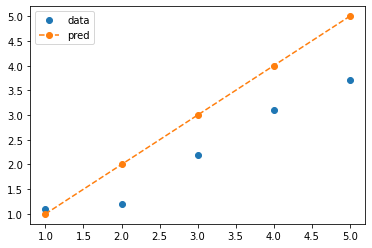

In [ ]:
plt.plot(x,y,marker='o',linestyle='')
plt.plot(x,y_pred,marker='o',linestyle='--')
plt.legend(["data","pred"]) #순서에 따른 선에 라벨 부여
plt.show()

## 2. 손실함수: 평균제곱오차 (Mean Squred Error)
---

</br>

### <center>$ MSE = \sum_{i=1}^m(y_i-\hat{y}_i)^2$</center>

### <center>$=\sum_{i=1}^m(y_i-wx_i-b)^2$

### **구현**

In [ ]:
def MSE(y,y_hat):
  l=0
  for yi, yi_hat in zip(y,y_hat):
    #zip을 써서 하나씩 불러오도록 함
    l+=(yi-yi_hat)**2
  return l



* 계산

In [ ]:
print(y, y_pred)
error=MSE(y,y_pred)
error

[1.1 1.2 2.2 3.1 3.7] [1 2 3 4 5]


3.789999999999999

### **Error 시각화**

*  W 값에 따른 Error 값 변화

<function matplotlib.pyplot.show>

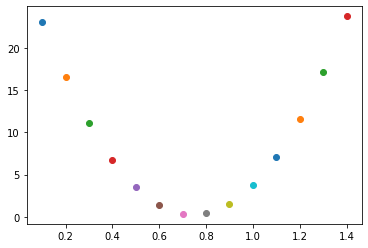

In [ ]:
w_array=np.arange(0.1,1.5,0.1)
for w in w_array:
  y_pred=hypothesis(x,w)
  error=MSE(y,y_pred)
  plt.plot(w,error,marker='o')
plt.show

## 3. 최적화: 경사하강법 ( Gradient Desent )
---
</br>

## <center>$w^* =  w-\alpha\frac{\theta }{\theta w}Cost(w) $</center>


<center> 기울기가 음수일 때: $\frac{\theta }{\theta w}Cost(w) < 0 \rightarrow w* = w+\alpha*(기울기)$</center>
<center>기울기가 음수이면 $w$는 지금보다 큰 값으로 업데이트</center>

</br>

<center> 기울기가 양수일 때: $\frac{\theta }{\theta w}Cost(w) > 0 \rightarrow w* = w-\alpha*(기울기)$</center>
<center>기울기가 양수이면 $w$는 지금보다 작은 값으로 업데이트</center>


### **구현**

In [ ]:
def diff(xi,yi,w):
  return 2*(xi**2)*w-2*xi*yi

def GD(xi,yi,w,alpha=0.01):
  return w-(alpha*diff(xi,yi,w))


### **학습**

In [ ]:
xi=x[0]
yi=y[0]
w=1

for xi,yi in zip(x,y):
  w_new=GD(xi,yi,w)
  print(w_new)

1.002
0.968
0.952
0.928
0.87


### **파라미터**: $\alpha$ 값에 따른 W 변화

In [ ]:
for xi,yi in zip(x,y):
  w_new=GD(xi,yi,w,alpha=0.1)
  print(w_new)

1.02
0.6799999999999999
0.52
0.28
-0.30000000000000004


## 4. 실습1: 단순 선형 회귀 분석(Simple Linear Regression Analysis)
---

<br>

###  <center>$f(x_i)=wx_i+b$</center>



### **데이터**

|공부시간|종합점수|
|------|---|
|0|0|
|1|11|
|2|23|
|3|30|
|4|44|
|5|55|
|6|61|
|7|73|
|8|84|
|9|98|



* 데이터 정의

In [ ]:
x=np.array(np.arange(10))
y=np.array([0,11,23,30,44,55,61,73,84,98])
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

* 시각화

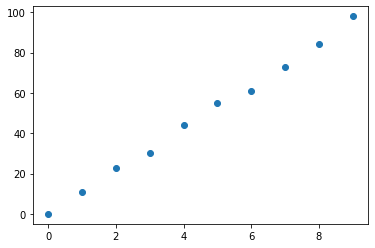

In [ ]:
plt.plot(x,y,linestyle='',marker='o')
plt.show()

### **모델 생성**

* 케라스를 이용한 모델 구현

In [ ]:
model=Sequential()#모델 생성 함수
model.add(Dense(1,input_dim=1,activation='linear'))#층 쌓기
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


* 학습파라미터 확인

In [ ]:
print(model.get_weights())#random값
print("W:",model.get_weights()[0],"b:",model.get_weights()[1])

[array([[0.7396947]], dtype=float32), array([0.], dtype=float32)]
W: [[0.7396947]] b: [0.]


* 학습파라미터 시각화

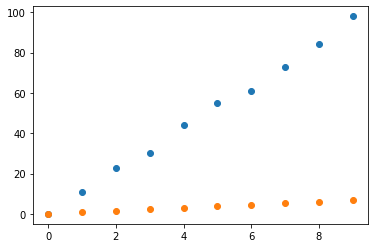

In [ ]:
y_pred = model.predict(x)

plt.plot(x, y, linestyle='', marker='o')
plt.plot(x, y_pred, linestyle='', marker='o')

plt.show()

### **학습**

* 모델 컴파일

In [ ]:
model.compile(loss='mse',optimizer=optimizers.SGD(learning_rate=0.01))

* 학습 진행

In [ ]:
model.fit(x,y,epochs=10)#epochs:반복횟수

Epoch 1/10
1/1 [==============================] - 0s 227ms/step - loss: 2789.5864
Epoch 2/10
1/1 [==============================] - 0s 4ms/step - loss: 484.6738
Epoch 3/10
1/1 [==============================] - 0s 4ms/step - loss: 86.4666
Epoch 4/10
1/1 [==============================] - 0s 8ms/step - loss: 17.6669
Epoch 5/10
1/1 [==============================] - 0s 3ms/step - loss: 5.7767
Epoch 6/10
1/1 [==============================] - 0s 3ms/step - loss: 3.7182
Epoch 7/10
1/1 [==============================] - 0s 3ms/step - loss: 3.3584
Epoch 8/10
1/1 [==============================] - 0s 3ms/step - loss: 3.2921
Epoch 9/10
1/1 [==============================] - 0s 3ms/step - loss: 3.2766
Epoch 10/10
1/1 [==============================] - 0s 3ms/step - loss: 3.2698


### **결과**

* 학습 파라미터 확인

In [ ]:
print(model.get_weights())#random값
print("W:",model.get_weights()[0],"b:",model.get_weights()[1])

[array([[10.393001]], dtype=float32), array([1.4670012], dtype=float32)]
W: [[10.393001]] b: [1.4670012]


* 시각화

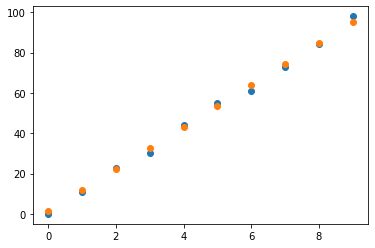

In [ ]:
y_pred = model.predict(x)

plt.plot(x, y, linestyle='', marker='o')
plt.plot(x, y_pred, linestyle='', marker='o')

plt.show()

* 결과예측

In [ ]:
x=[10,11]
model.predict(x)

array([[105.39701],
       [115.79001]], dtype=float32)

## 5. 실습2: 다중선형회귀 (Multiple Linear Regression Analysis)
---
<br>

###  <center>$f(\vec{x_i})={w}\vec{x}_i+b$</center>

### **데이터**
|공부시간|집중도|수면시간|종합성적|
|------|---|---|---|
|0|1|9|0|
|1|1|8.5|11|
|2|2|8|23|
|3|4|8|30|
|4|3|7|44|
|5|5|7.5|55|
|6|6|7|61|
|7|6|6|73|
|8|7|7|84|
|9|6|6.5|98|



* 데이터 정의

In [ ]:
x=np.array([[1,1,9],[1,1,8.5],[2,2,8],[3,4,8],[4,3,7],[5,5,7.5],[6,6,7],[7,6,6],[8,7,7],[9,6,6.5]])
y=np.array([0,11,23,30,44,55,61,73,84,98])

x.shape,y.shape

((10, 3), (10,))

### **모델 생성**

* 케라스를 이용한 모델 생성

In [ ]:
model=Sequential()#모델 생성 함수
model.add(Dense(1,input_dim=3,activation='linear'))#층 쌓기
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


* 학습 파라미터 확인

In [ ]:
print(model.get_weights())#random값
print("W:",model.get_weights()[0],"b:",model.get_weights()[1])

[array([[-0.5281801 ],
       [ 0.8209361 ],
       [ 0.25514925]], dtype=float32), array([0.], dtype=float32)]
W: [[-0.5281801 ]
 [ 0.8209361 ]
 [ 0.25514925]] b: [0.]


### **학습**

* 모델 컴파일

In [ ]:
model.compile(loss='mse',optimizer=optimizers.SGD(learning_rate=0.01))

* 학습 진행

In [ ]:
model.fit(x,y,epochs=10)#epochs:반복횟수

Epoch 1/10
1/1 [==============================] - 0s 212ms/step - loss: 2959.6753
Epoch 2/10
1/1 [==============================] - 0s 4ms/step - loss: 2536.2166
Epoch 3/10
1/1 [==============================] - 0s 7ms/step - loss: 2197.0151
Epoch 4/10
1/1 [==============================] - 0s 3ms/step - loss: 1919.4792
Epoch 5/10
1/1 [==============================] - 0s 4ms/step - loss: 1688.1429
Epoch 6/10
1/1 [==============================] - 0s 3ms/step - loss: 1492.2709
Epoch 7/10
1/1 [==============================] - 0s 3ms/step - loss: 1324.2874
Epoch 8/10
1/1 [==============================] - 0s 3ms/step - loss: 1178.7429
Epoch 9/10
1/1 [==============================] - 0s 3ms/step - loss: 1051.6296
Epoch 10/10
1/1 [==============================] - 0s 4ms/step - loss: 939.9305


### **결과**

* 학습 파라미터 확인

In [ ]:
print(model.get_weights())#random값
print("W:",model.get_weights()[0],"b:",model.get_weights()[1])

[array([[ 4.643941 ],
       [ 3.9957492],
       [-2.32061  ]], dtype=float32), array([-0.10818478], dtype=float32)]
W: [[ 4.643941 ]
 [ 3.9957492]
 [-2.32061  ]] b: [-0.10818478]


* 결과 예측

In [ ]:

x=[[10,11,12]]
model.predict(x)

array([[62.43714]], dtype=float32)